In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_data = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

100.0%
100.0%
100.0%
100.0%


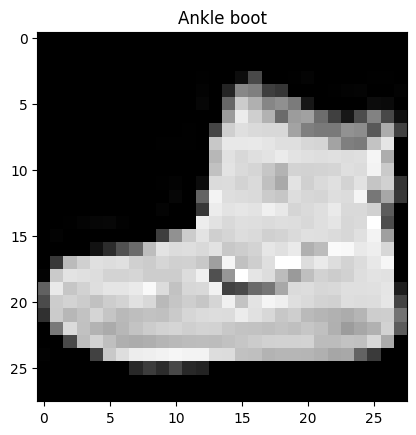

In [ ]:
from matplotlib import pyplot as plt


classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(classes[label])
plt.show()

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.2860], std=[0.3530])
])

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [10]:
from torch.utils.data import DataLoader

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 13 * 13, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = x.view(-1, 32 * 13 * 13)  
        x = self.fc1(x)
        return x

model = SimpleCNN()

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 0.2551446259021759
Epoch 1, Loss: 0.3113890588283539
Epoch 2, Loss: 0.33739903569221497
Epoch 3, Loss: 0.30220672488212585
Epoch 4, Loss: 0.36640191078186035
Epoch 5, Loss: 0.2683168649673462
Epoch 6, Loss: 0.12221255898475647
Epoch 7, Loss: 0.09237034618854523
Epoch 8, Loss: 0.14233168959617615
Epoch 9, Loss: 0.059310432523489


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Accuracy: 90.15%


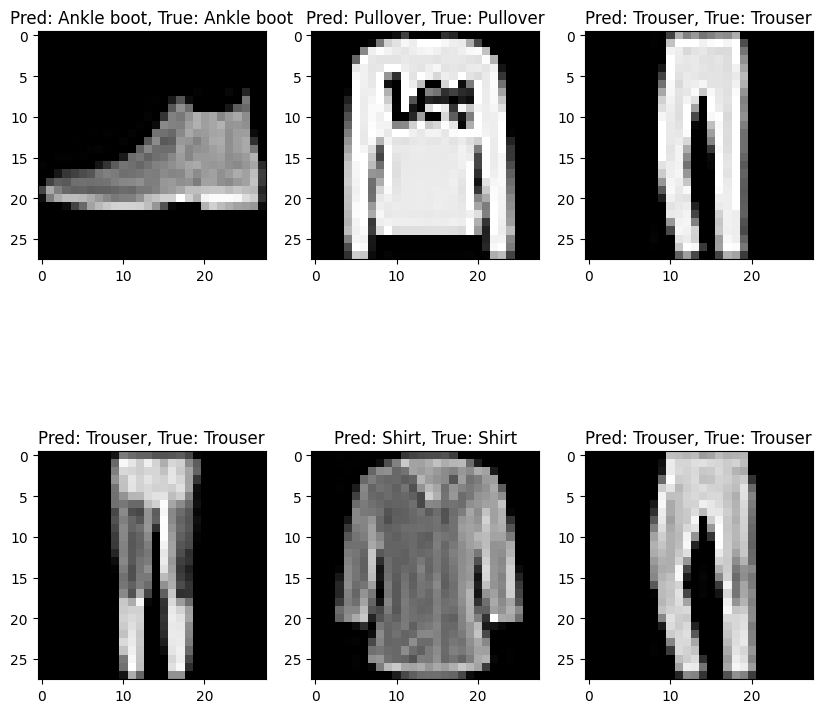

In [ ]:
images, labels = next(iter(test_loader))
outputs = model(images)
_, preds = torch.max(outputs, 1)


fig = plt.figure(figsize=(10, 10))
for i in range(6):
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(images[i].permute(1, 2, 0).squeeze(), cmap='gray')
    ax.set_title(f"Pred: {classes[preds[i]]}, True: {classes[labels[i]]}")
plt.show()